# Question 1

The golden-section search algorithm is a method for finding maxima of functions  that is similar to the bisection method for finding roots of equations. the difference lies in that, instead of bracketing a root with two points, we bracket a maximum. Therefore, we need an interior point to check whether there is actually a maximum between xl and xu. 
In the golden-search method, we choose two points between xl and xu, x1 and x2. They will lie a distance d to the right of xl and a distance d to the left of xu, respectively. The function will be evaluated at the two interior points. If f(x1) > f(x2), then the dominion to the left of x2 can be eliminated because it does not contain a maximum. If f(x1) < f(x2), the converse is true. We choose the appropriate new interval and proceed to the next iteration.
The method is called the golden section ratio because it can be shown that the optimum value for d lies at 5-12times the distance between the bracketing points, which is known as the golden ratio.

In [7]:
import math

def golden_section(f, xl, xu, es=1e-4, max_iter=100):
    
    golden = (math.sqrt(5) - 1) / 2
    ea = 1
    iterations = 0
    
    while abs(ea) > es and iterations < max_iter:
        d = golden * (xu - xl) 
        
        prev = (xl + xu) / 2
        x1 = xl + d
        x2 = xu - d
        
        f_x1 = f(x1)
        f_x2 = f(x2)
        
        if f_x1 > f_x2:
            xl = x2
        elif f_x2 > f_x1:
            xu = x1
        
        current = (xl + xu) / 2
        ea = (current - prev) / current
        iterations += 1
        
    return current
    
golden_section(lambda x: -x**2 + 5*x, -2, 20)

2.500013060145121

# Question 2

 You are designing a spherical tank to hold water for a small village in a developing country. The volume of liquid it can hold can be computed as V = h23R - h3.
If R = 3 m, what depth must the tank be filled to so that it holds 30 m3? Use three iterations of the Newton-Raphson method to determine your answer. Determine the approximate relative error after each iteration. Note that an initial guess of R will always converge.


In [2]:
def f(h, R=3):
    return R * math.pi * h**2 - math.pi*h**3 / 3 - 30

def fprime(h, R=3):
    return 2*math.pi*R* h - math.pi*h**2

R = 3
x0 = R

x1 = x0 - f(x0) / fprime(x0)
x2 = x1 - f(x1) / fprime(x1)
x3 = x2 - f(x2) / fprime(x2)

x1, x2, x3

(2.0610329539459693, 2.02704206569749, 2.026905730555795)

# Question 3

 An automobile company has two versions of the same model car for sale, a two-door coupe and the full-size four door. The inputs and constraints are given by the following table:



Two door
Four door
Availability
Profit
13500 €/car
15000 €/car


Production time
15 h/car
20 h/car
8000 h/year
Storage
400 cars
350 cars


Consumer demand
700 demand units/car
500 demand units/car
240000 demand units


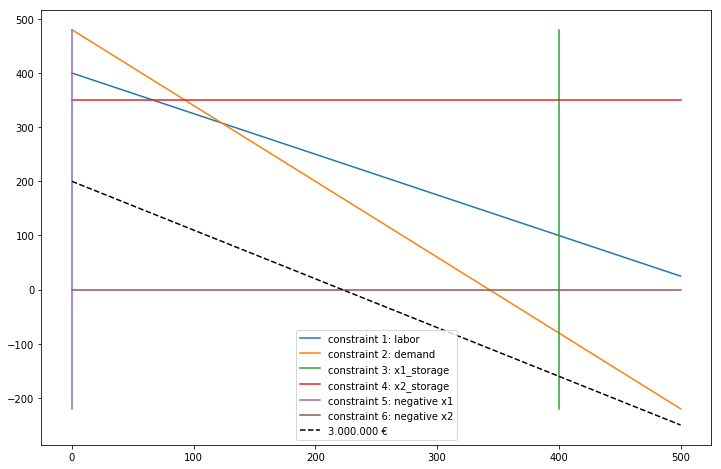

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(0, 500)

const_1 = (8000 - 15*xs) / 20
const_2 = (240000 - 700*xs) / 500
const_3 = 400
const_4 = 350
const_5 = 0
const_6 = 0

objective_3e6 = (3e6 - 13500*xs ) / 15000

plt.plot(xs, const_1, label="constraint 1: labor")
plt.plot(xs, const_2, label="constraint 2: demand")
plt.plot([const_3] * len(const_2), const_2, label="constraint 3: x1_storage")
plt.plot(xs, [const_4] * len(xs), label="constraint 4: x2_storage")
plt.plot([const_5] * len(const_2), const_2, label="constraint 5: negative x1")
plt.plot(xs, [const_6] * len(xs), label="constraint 6: negative x2")
plt.plot(xs, objective_3e6, label="3.000.000 €", c='black', linestyle='--')
plt.gcf().set_size_inches(12,8)
plt.legend();

$$x_1 \approx 125 $$

$$x_2 \approx 300 $$

$$z = 13.500 \cdot 125 + 15.000 \cdot 300 = 6187500$$ 

# Question 4

 Given the system of linear equations:
```
2x1-6x2-x3= -38
-3x1-x2+7x3 = -34
-8x1+x2-2x3= -20
```

Use any of the methods we studied to solve it.


In [4]:
AB = np.array([2,-6, -1, -38, -3, -1, 7, -34, -8, 1, -2, -20]).reshape(3,4)

AB

array([[  2,  -6,  -1, -38],
       [ -3,  -1,   7, -34],
       [ -8,   1,  -2, -20]])

In [5]:
def gauss_jordan(A, B):
    AB = np.concatenate((A, B.reshape(-1,1)), axis=1)
    n = A.shape[0]
    
    for row in range(n):
        others = list(range(n))
        others.remove(row)
        
        for other_row in others:
            # Eliminate column row from other rows
            AB[other_row] = AB[other_row] - AB[row] * AB[other_row,row] / AB[row,row]

    # normalize 
    for row in range(n):
        
        AB[row] = AB[row] / AB[row,row]
    
    return AB

gauss_jordan(AB[:,:3], AB[:,3])

array([[ 1,  0,  0,  3],
       [ 0,  1,  0,  8],
       [ 0,  0,  1, -2]])